# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.


## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

we're going to use pandas, matplotlib and Numpy for data analysis and manipulation 

In [1]:
# Import all tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 # we want our plots to appear inside the notebook
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve



# Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find our more about the data and beccome a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where aer the outliers and why should about them?
5. How can you add, change or remore features to get more out of your data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Let's find our how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

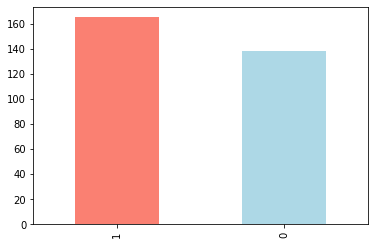

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Heart Disease Frequeny according to Sex

In [9]:
df.sex.value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64>

In [10]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


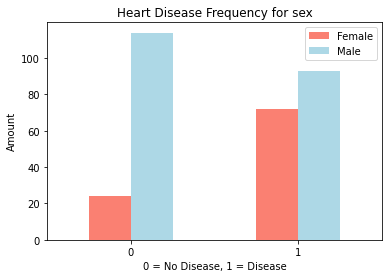

In [11]:
# Creeate a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"] )
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

**Age vs Max Heart Rate for Heart Disease**

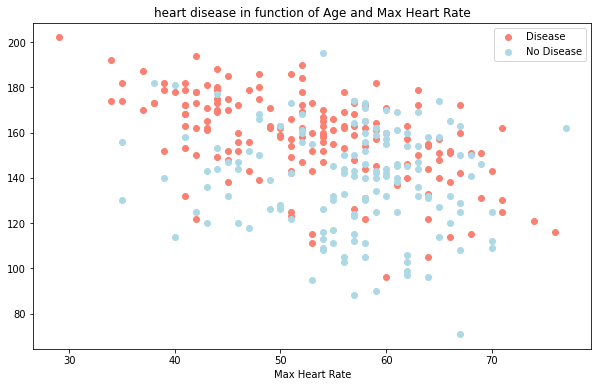

In [12]:
# Create Another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], 
           df.thalach[df.target==1],
           c="salmon");
# scatter with the negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0], 
           c="lightblue")
# Add some helpful info
plt.title("heart disease in function of Age and Max Heart Rate")
plt.xlabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [13]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

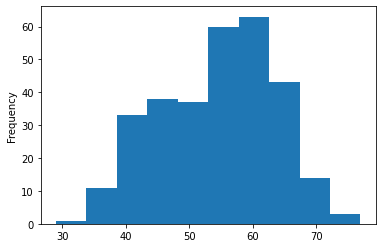

In [14]:
df.age.plot(kind="hist"); ## // df.age.plot.hist()

### Heart Disease frequency per Chest pain type
3. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


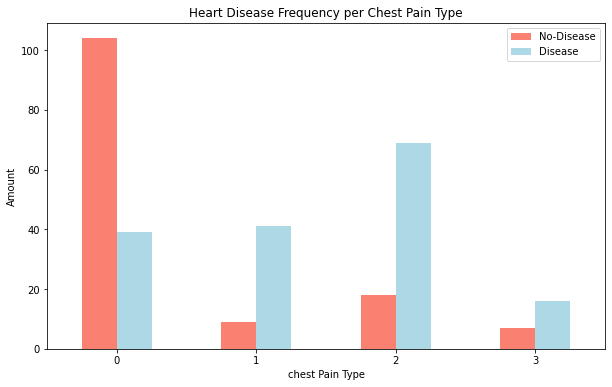

In [16]:
# Make the crosstab more visual 
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No-Disease", "Disease"]);
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Make a corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


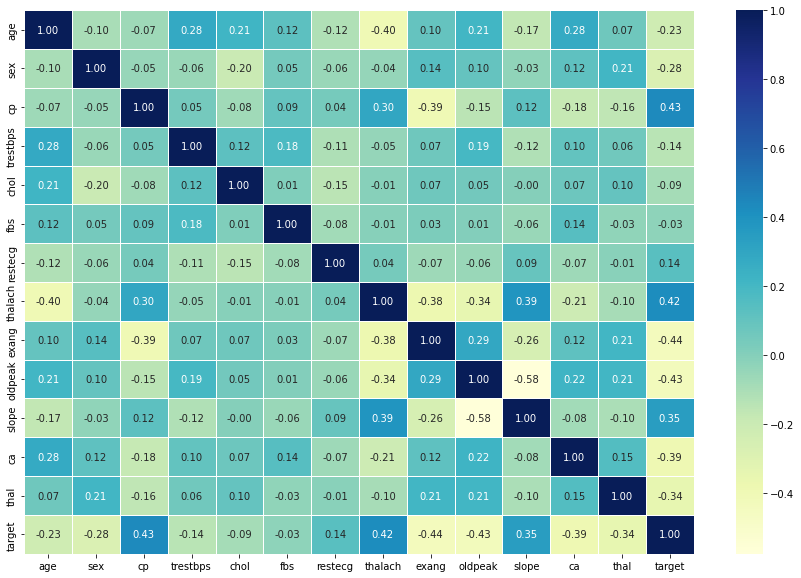

In [19]:
corr_matrix = df.corr()
fig, ax =  plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt = ".2f",
                cmap="YlGnBu")

A Correlation matrix describes correlation among M variables. It is a square symmetrical MxM matrix with the (ij)th element equal to the correlation coefficient r_ij between the (i)th and the (j)th variable. The diagonal elements (correlations of variables with themselves) are always equal to 1.00.

for understanding the corleation please visit this site https://medium.com/analytics-vidhya/what-is-correlation-4fe0c6fbed47#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjcyOTE4OTQ1MGQ0OTAyODU3MDQyNTI2NmYwM2U3MzdmNDVhZjI5MzIiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NDgwMTU3OTQsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwNzc3MDE4Njg1MTA2NjQwMDYzNCIsImVtYWlsIjoiYXBvZmZpY2lhbDIwMDJAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImF6cCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsIm5hbWUiOiJBbWFuIFBhdGVsIiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FBVFhBSnk1SGZFQThsX0lHOUVuMy1XX2xEcTVWYjZSVTg5ajkwaWZ2R1VKPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IkFtYW4iLCJmYW1pbHlfbmFtZSI6IlBhdGVsIiwiaWF0IjoxNjQ4MDE2MDk0LCJleHAiOjE2NDgwMTk2OTQsImp0aSI6IjA5Y2IxODU1OGJkOTkxOTdjYmY5YTQ5MzE5MjE2OTNjOTExNmRkN2UifQ.ggaL3w5BV02o6fCPU8M8h-nmxyWgHhe9Iby4kom9ocSVNbOpoI6s8R0-stT_B7Qpfhz-Q0lOYlbAjttDwnQ9bdE8DgnefnuUaAsS94Wp-x9rMiKjshFO8L3vVYRigq5kstQMunf8HgiUIv9IMtjcce-b-U_oVjMpFXe7ebD2DUozVtgSBEsGo6EDqlEuGnadIU0VyXslq7zKeIWy-P3Y9Dd70fznGGevJ3DykH6aQdksJCby1TpaRB6PX_aizpxAKEbd8NMPesFYX9-XB66E3fjrWuGLZzIg7X_ksrIu74HBSSUoc_Tw_EsvanmbVMjohkWU7j7FB3-H_Q8CRk_I_Q


this is the one of the best article that we have seen and we are getting in this field

## 5. Modelling 

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
# Split the data X and y
X = df.drop("target", axis=1)
y = df.target

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we have got our dasta split into training and test sets, it's time to build a machine learning model.
We'll train it (find the patterns) on the training set.
And we'll test it(use the patterns) on the test set.

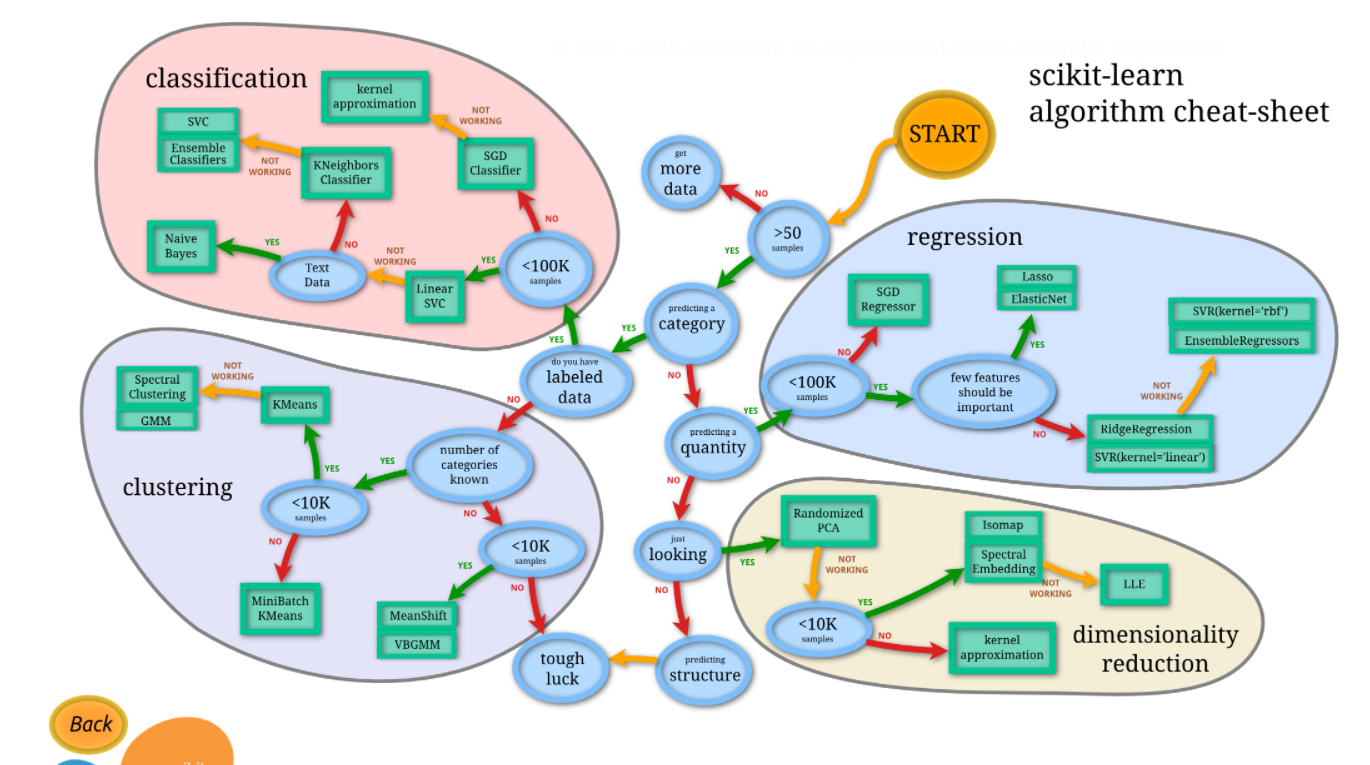

we're going to try to 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbor
3. Random Forest Classifier

In [37]:
# Put models in a dictionary 
models = {"Logistric Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(n_estimators=100)}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of differetn sciket-Learn mahcine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_test: testing  labels
    y_test: test labels
    """
    # set the random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [42]:
model_scores = fit_and_score(models = models, 
              X_train = X_train,
              X_test = X_test,
              y_train = y_train,
              y_test = y_test)

c:\users\apoff\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Comaprision

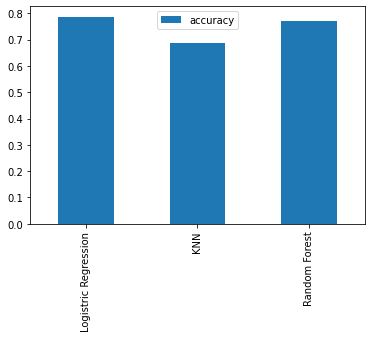

In [43]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

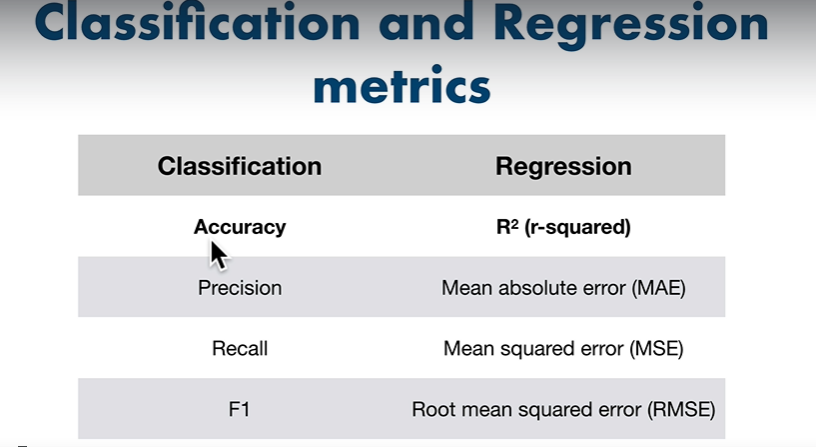
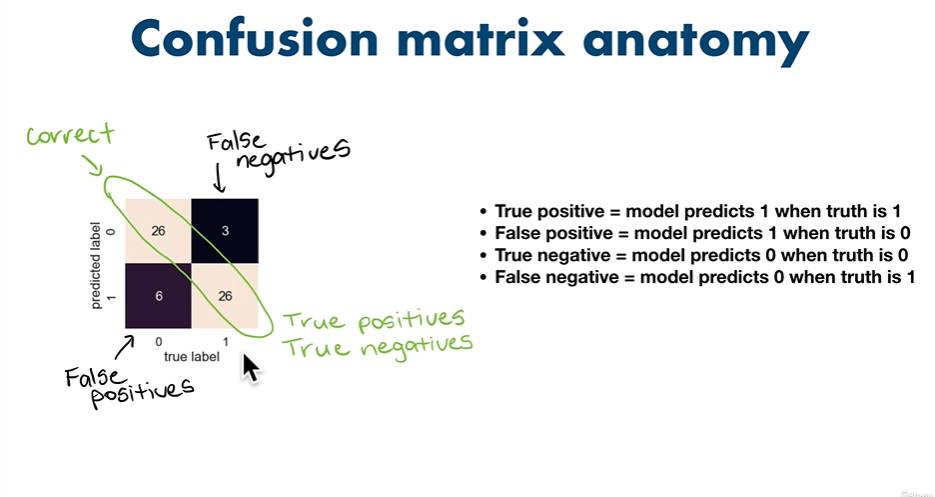

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [53]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # update the test score list
    test_scores.append(knn.score(X_test, y_test))

In [54]:
pd.DataFrame({"train_scores": train_scores,  "test_scores": test_scores})

,train_scores,test_scores
0,1.000000,0.590164
1,0.814050,0.524590
2,0.768595,0.704918
3,0.772727,0.704918
4,0.764463,0.721311
5,0.739669,0.721311
6,0.723140,0.721311
7,0.714876,0.688525
8,0.731405,0.704918
9,0.710744,0.672131


Maximum KNN score on the test data:72.131148%


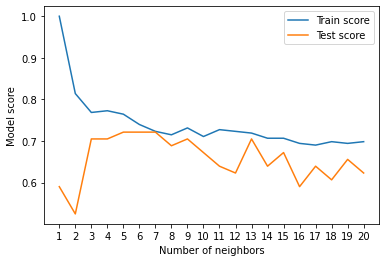

In [59]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data:{max(test_scores)*100:2f}%");

## HyperParameters tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()


 ... using RandomizedSearchCV
 if u want to learn about the randomsearchCV https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [68]:
# Create a hyperparameter grid for logistic Regression

log_reg_grid = {"C": np.logspace(-4, 4, 20), 
               "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split":np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}


Now we have got hyperparameters grid setup for each of our  models, let's tune them using RandomizedSearchCV

In [77]:
# Tuen LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=60,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

c:\users\apoff\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=60. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=60,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [78]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [79]:
rs_log_reg.score(X_test, y_test)

0.819672131147541

Now we've tuned LogisticRegression() model, let's do the same for RandomForestClassifier()... 

In [80]:
# Setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
# Fit random hyperparameter search model 
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [81]:
# Find the best Parameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [82]:
rs_rf.score(X_test, y_test)

0.8524590163934426

## Tuning the Hyperparameters GridSearchCV 

Since our LogisticRegression model provides the best scores so far, we will try and improve them again using GridSearchCV....

In [87]:
# Different hypperparameters for our LogisticRegression model
log_reg_model = {"c":np.logspace(-4, 4, 30),
                "solver":["liblinear"]}

# Setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit gird hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [88]:
gs_log_reg.score(X_test, y_test)

0.819672131147541

In [90]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [91]:
model_scores

{'Logistric Regression': 0.7868852459016393,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.7704918032786885}

## Evaluating our tunred machine learning classifier, beyond accuracy

* ROC curve and AUC curve
* Confusion Matrix
* Classification Matrix
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

To make comparisions and evaluate our trained model, first we need to make predictions

In [93]:
y_preds = gs_log_reg.predict(X_test)

In [94]:
y_preds

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [95]:
y_test

163    1
33     1
15     1
49     1
57     1
      ..
93     1
3      1
285    0
77     1
235    0
Name: target, Length: 61, dtype: int64

c:\users\apoff\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


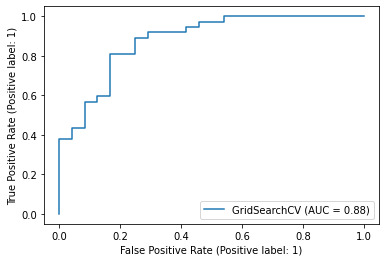

In [97]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [98]:
print(confusion_matrix(y_test, y_preds))

[[17  7]
 [ 4 33]]


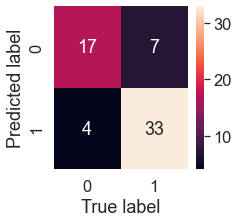

In [107]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig , ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                cbar=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom+0.5, top-0.5)
plot_conf_mat(y_test, y_preds)

Now we have got a ROC curve , an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall , f1-score

In [108]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.82      0.89      0.86        37

    accuracy                           0.82        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [114]:
clf_rt = classification_report(y_test, y_preds)
type(clf_rt)

str

In [120]:
len(clf_rt)

326

In [122]:
"precision" in clf_rt


True

In [123]:
"accuracy" in clf_rt

True

### Calculate evalution metrics using cross-validation score

In [124]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [125]:
clf = LogisticRegression(C=0.08858667904100823,
                        solver = "liblinear")

In [131]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [164]:
cv_acc = np.mean(cv_acc)

In [165]:
cv_acc

0.834808743169399

In [166]:
# Cross Validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8182683982683983

In [167]:
# Cross-validated recall
cv_recall = np.mean(cross_val_score(clf, X, y, scoring="recall"))
cv_recall

0.9030303030303031

In [168]:
# Cross-validated f1-score
cv_f1 = np.mean(cross_val_score(clf, X, y, scoring="f1"))
cv_f1

0.8572876223964057

In [170]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1score},
                         index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.834809,0.818268,0.90303,0.857288


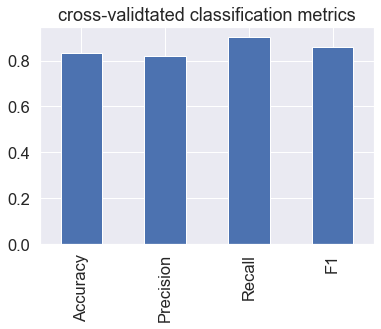

In [173]:
cv_metrics.T.plot.bar(title="cross-validtated classification metrics",
                     legend=False);

### Feature importance

Feature importance is another as asking, "which feature contributed most to the outcomes of the model and how did they contribute?"

Finding features immportance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our `LogisticRegression()` model....

In [179]:
# Fit an instance of LogsiticRegression
clf = LogisticRegression(C=0.08858667904100823,
                        solver = "liblinear")

clf.fit(X_train, y_train);

In [188]:
len(df.columns)
df.columns[:13]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [184]:
# check coef_
len (clf.coef_[0])

13

In [197]:
feature_coff_df = pd.DataFrame(clf.coef_[0], df.columns[:13])
feature_coff_df

,0
age,0.013533
sex,-0.623872
cp,0.577348
trestbps,-0.020998
chol,-0.002176
fbs,-0.026673
restecg,0.258057
thalach,0.027328
exang,-0.344795
oldpeak,-0.374339


In [198]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [199]:
feature_dict

{'age': 0.013532538518525048,
 'sex': -0.6238716233768502,
 'cp': 0.5773475505257928,
 'trestbps': -0.020997646139758647,
 'chol': -0.002176137401465516,
 'fbs': -0.0266727234619862,
 'restecg': 0.25805679770078,
 'thalach': 0.02732829647068443,
 'exang': -0.3447947412098859,
 'oldpeak': -0.37433936734873086,
 'slope': 0.34962578279242185,
 'ca': -0.6205498908277798,
 'thal': -0.5447010071864091}

In [213]:
feature_df = pd.DataFrame(feature_dict, index=[0])

<AxesSubplot:title={'center':'Feature Importance'}>

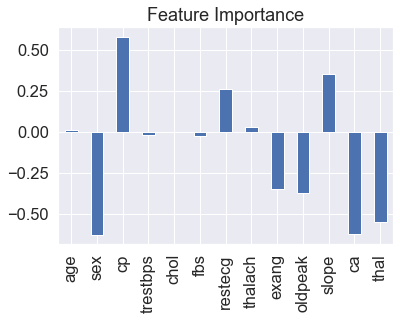

In [214]:
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [215]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [216]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope- the slope of the peak exercide ST segment
* 0:  Upsloping: better heart rate with exercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopings: signs of unhealthy heart

In [ ]:
## 6. Experimentation

If you haven't  hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoose?